In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Statistical Summary

In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

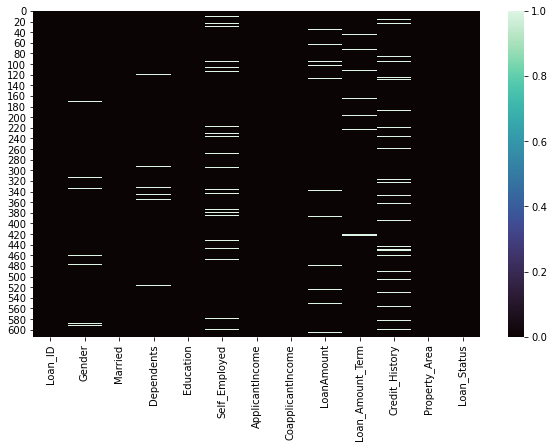

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

In [10]:
columns_with_nan = ["Gender", "Married", "Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

In [11]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

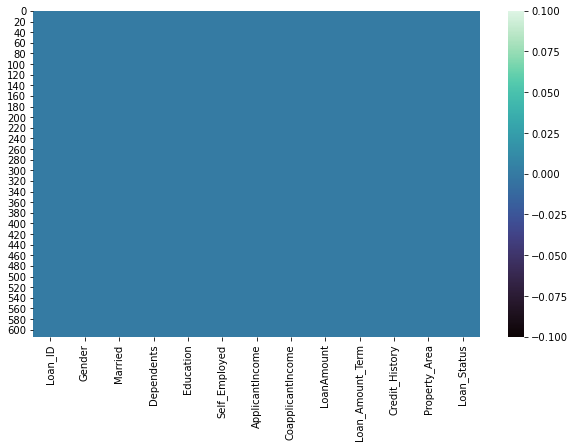

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

# Exploratory Data Analysis

### Univariate Analysis

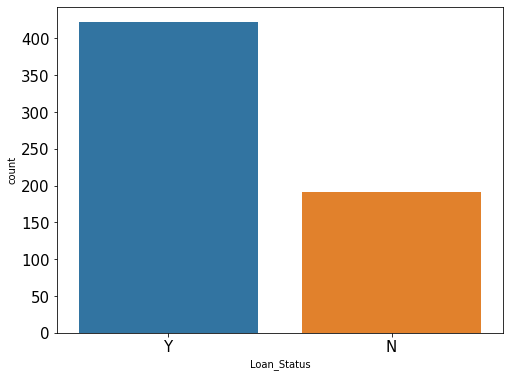

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
plt.figure(figsize = (8,6),facecolor='White')
sns.countplot(x='Loan_Status', data = data)
plt.tick_params(labelsize=15)
plt.show()
data['Loan_Status'].value_counts()

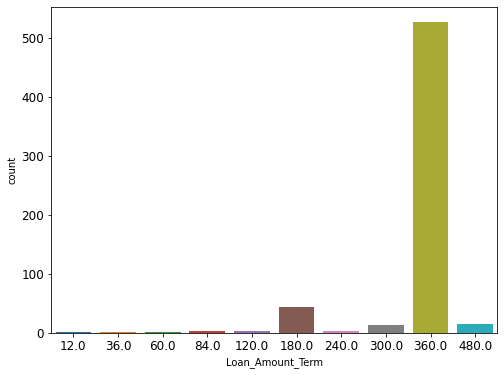

In [14]:
plt.figure(figsize = (8,6),facecolor='White')
sns.countplot(x='Loan_Amount_Term', data = data)
plt.tick_params(labelsize=12)
plt.show()

### Bivariate Analysis

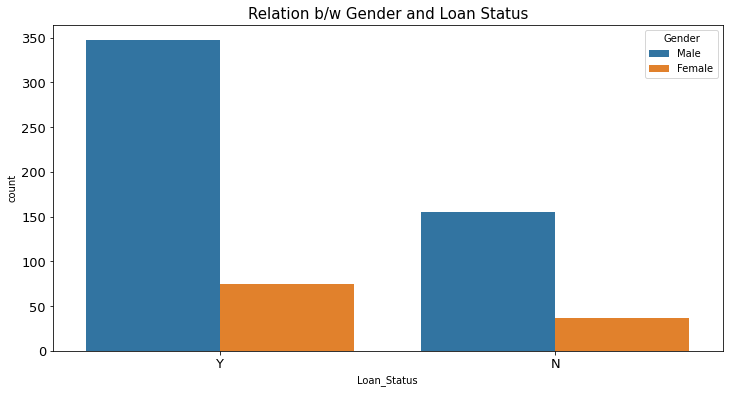

In [15]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(data['Loan_Status'],hue = data['Gender'])
plt.title('Relation b/w Gender and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

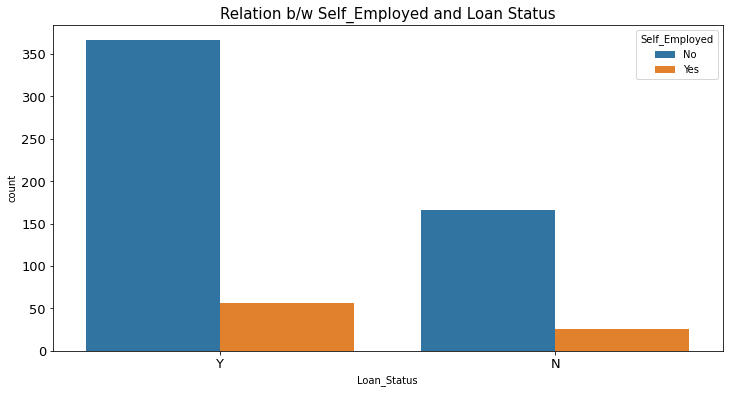

In [16]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(data['Loan_Status'],hue = data['Self_Employed'])
plt.title('Relation b/w Self_Employed and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

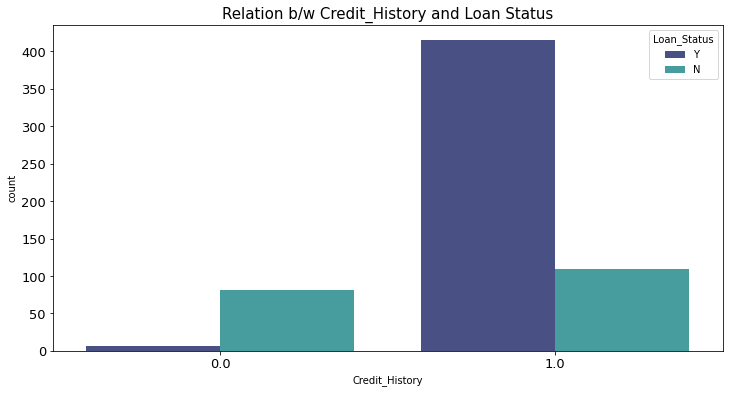

In [17]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(data['Credit_History'],hue=data['Loan_Status'],palette="mako")
plt.title('Relation b/w Credit_History and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

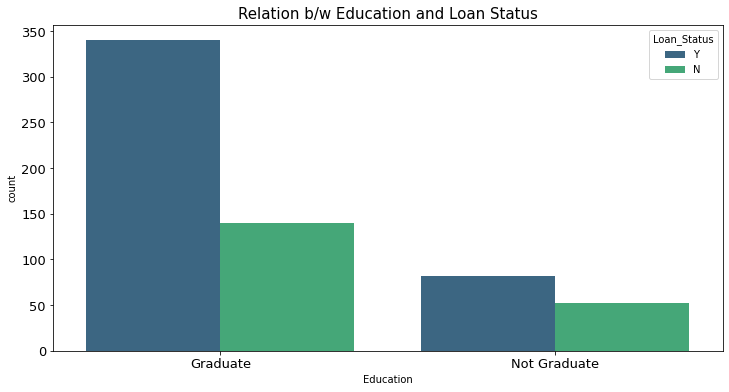

In [18]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Education',data = data,hue="Loan_Status",palette="viridis")
plt.title('Relation b/w Education and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

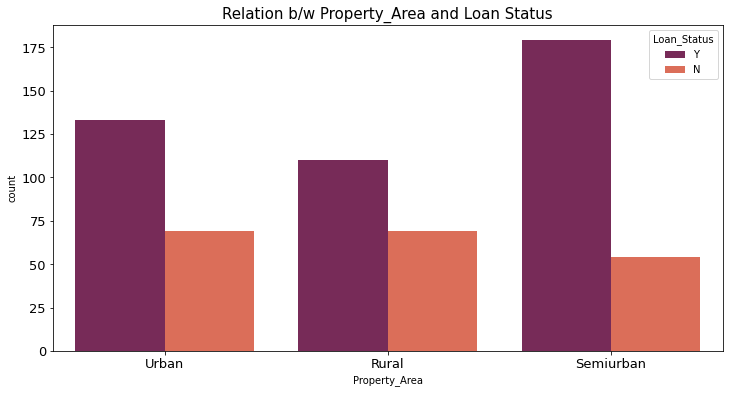

In [19]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Property_Area',data = data,hue="Loan_Status",palette="rocket")
plt.title('Relation b/w Property_Area and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

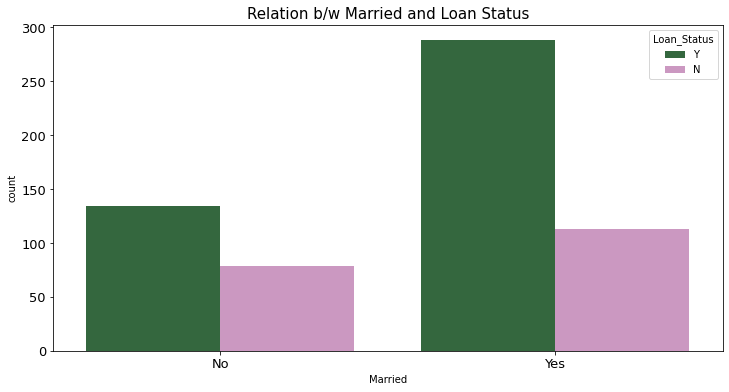

In [20]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Married',data = data,hue="Loan_Status",palette="cubehelix")
plt.title('Relation b/w Married and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

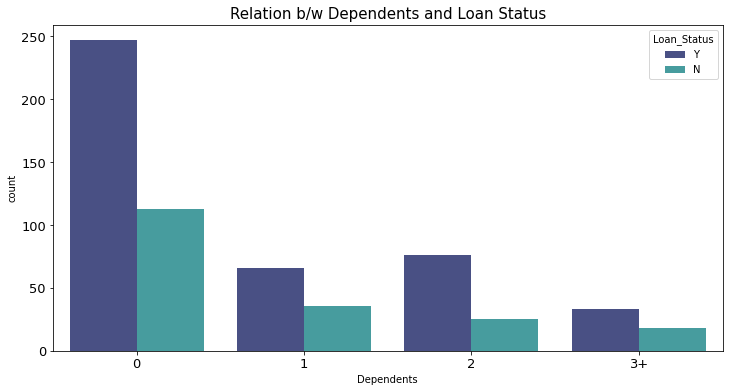

In [21]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Dependents',data = data,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Dependents and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

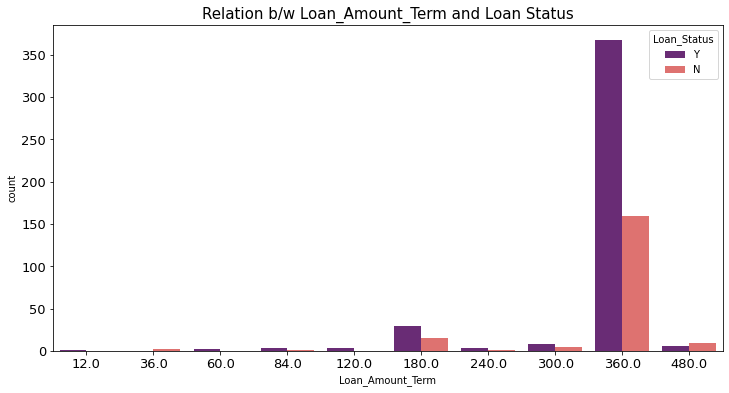

In [22]:
plt.figure(figsize = (12,6),facecolor='White')
sns.countplot(x='Loan_Amount_Term',data = data,hue="Loan_Status",palette="magma")
plt.title('Relation b/w Loan_Amount_Term and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

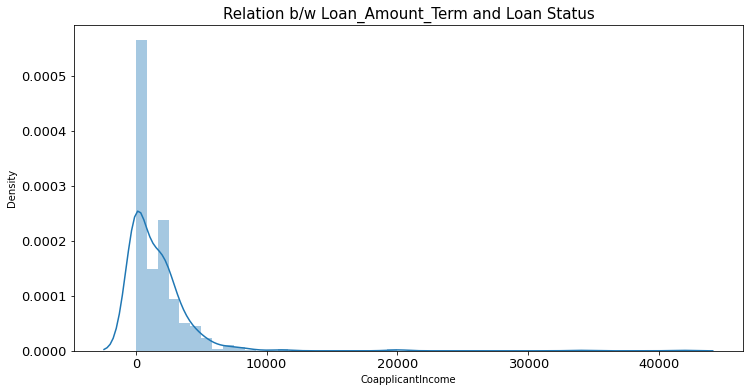

In [23]:
plt.figure(figsize = (12,6),facecolor='White')
sns.distplot(data['CoapplicantIncome'])
plt.title('Relation b/w Loan_Amount_Term and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

### Multivariate Analysis

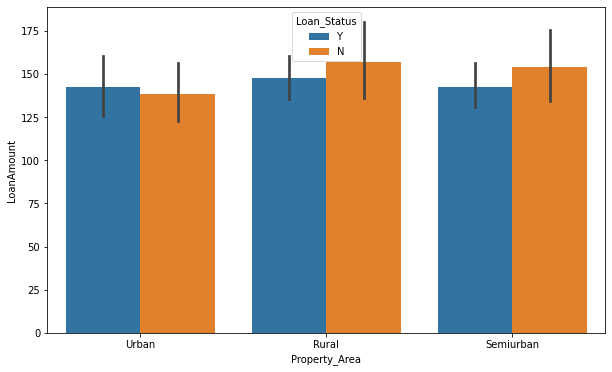

In [24]:
plt.figure(figsize = (10,6))
sns.barplot(x=data['Property_Area'],y=data['LoanAmount'],hue=data['Loan_Status'])
plt.show()

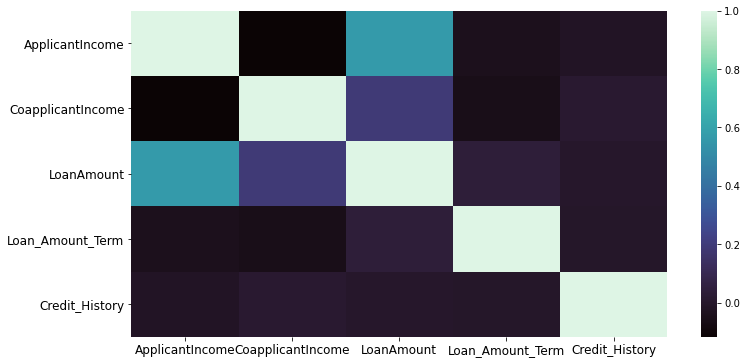

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=False,cmap='mako')
plt.tick_params(labelsize=12)
plt.show()

In [26]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


# Data Pre-processing

In [27]:
data = data.drop(columns='Loan_ID')

In [28]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

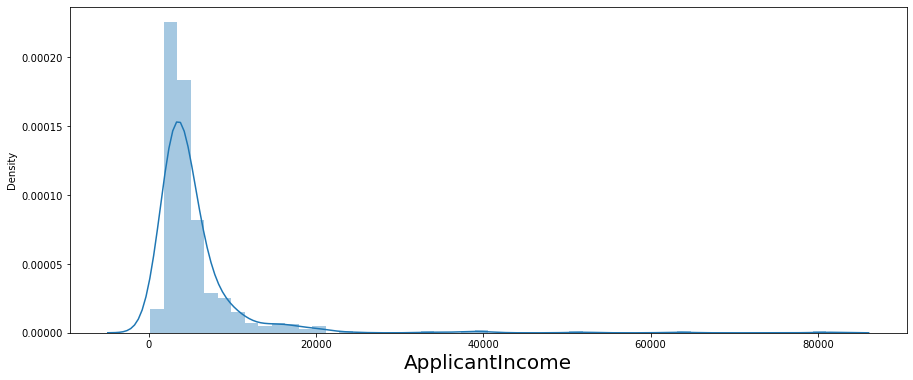

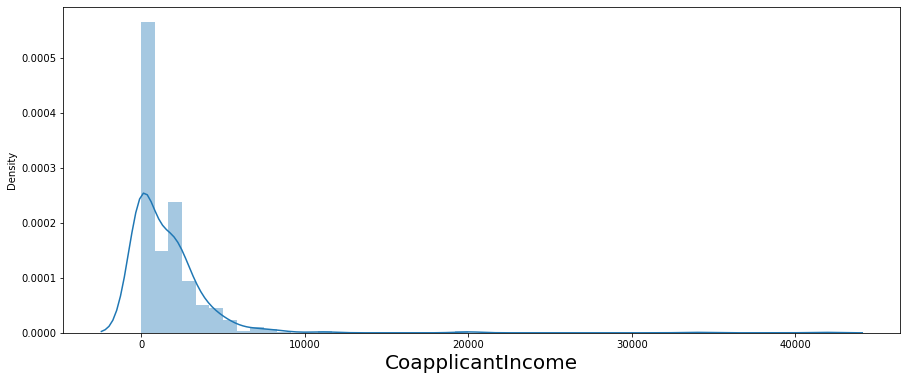

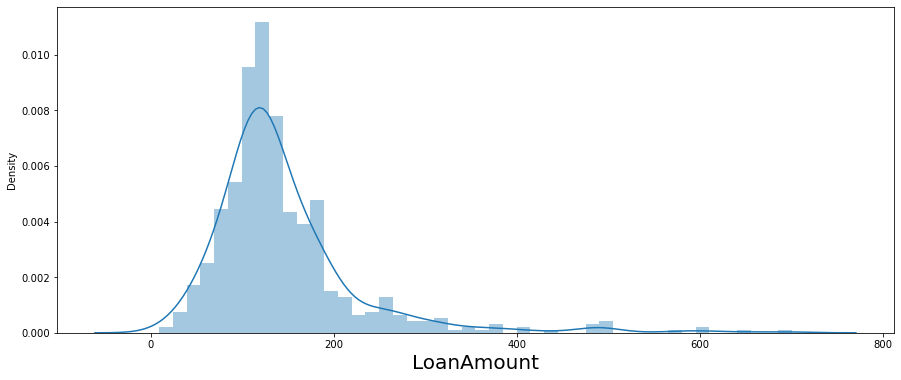

In [29]:
for i in features:
    plt.figure(figsize=[15,6])
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=20)
plt.show()

### Removing the outliers

##### Applying the IQR Method

In [31]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1
data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [32]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (564, 12)
Percentage Loss      : 8.143322475570033


##### Applying the zscore Method

In [33]:
from scipy.stats import zscore  #importing zscore from library
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers
z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [34]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (589, 12)
Percentage Loss      : 4.071661237785016


In [35]:
data_new = data_new2.copy()

### Skewness

In [36]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [37]:
data_new.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.126225
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

In [38]:
from sklearn.preprocessing import PowerTransformer #importing the library
scaler = PowerTransformer(method='yeo-johnson')
data_new['ApplicantIncome'] = scaler.fit_transform(data_new['ApplicantIncome'].values.reshape(-1,1))
data_new['CoapplicantIncome'] = scaler.fit_transform(data_new['CoapplicantIncome'].values.reshape(-1,1))
data_new['LoanAmount'] = scaler.fit_transform(data_new['LoanAmount'].values.reshape(-1,1))

In [39]:
data_new.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060859
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

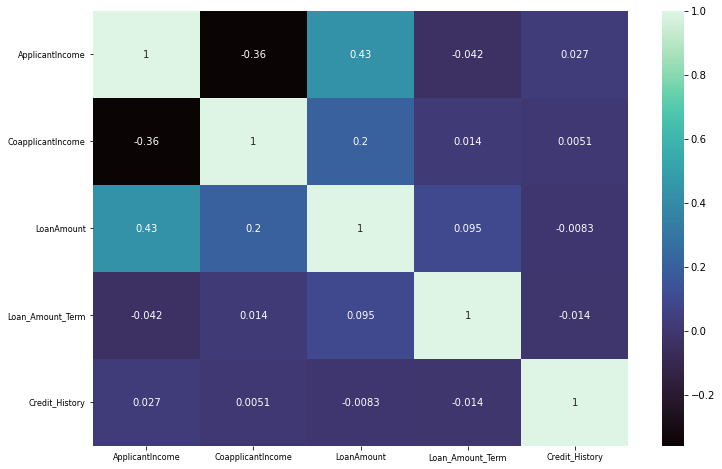

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(),annot=True,cmap='mako')
plt.tick_params(labelsize=8)
plt.show()

## Encoding Data

In [41]:
l1 = ['Gender', 'Married','Education','Loan_Status','Self_Employed']

In [42]:
from sklearn.preprocessing import LabelEncoder  #importing library
le = LabelEncoder()  #calling function
for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,1
1,1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,Rural,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,1
3,1,1,0,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,1
4,1,0,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,Urban,1


In [43]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [44]:
data['Dependents'].value_counts()  

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [45]:
l2 = pd.get_dummies(data_new['Property_Area'])
l3 = pd.get_dummies(data_new['Dependents'])
data_new=pd.concat([data_new.drop('Property_Area',axis=1),l2],axis=1)
data_new=pd.concat([data_new.drop('Dependents',axis=1),l3],axis=1)

In [46]:
data_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,1,0,0,1,1,0,0,0


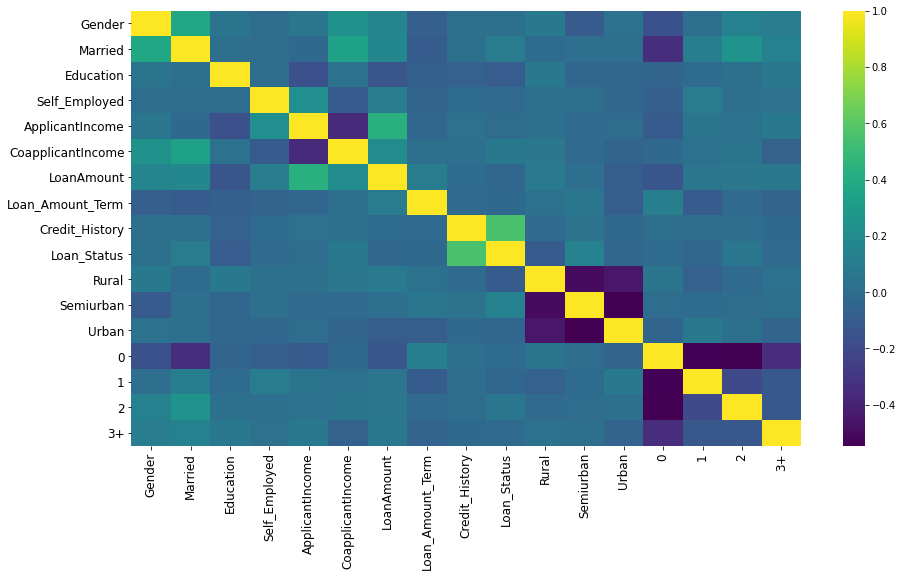

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=False,cmap='viridis')
plt.tick_params(labelsize=12)
plt.show()

# Splitting Features & Labels

In [48]:
X = data_new.drop(columns = 'Loan_Status')
Y = data_new['Loan_Status'] 

### Balance the Imbalanced label class

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [50]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

1    50.0%
0    50.0%
Name: Loan_Status, dtype: object

## Scaling the data

In [51]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X_over)

### Finding the Best Random State

In [52]:
from sklearn.linear_model import LogisticRegression
maxAccuracy = 0
maxAcc = 0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8588957055214724  with Random State  125


### Splitting Train and Test data

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = maxAcc)

# Model Building

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [55]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) 
y_pred_log = Log_Reg.predict(x_test) 
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Accuracy Score: 0.8588957055214724
Cross Validation Score:  [0.70552147 0.71779141 0.83435583 0.88343558 0.85802469]
Avg_Cross_Validation Score:  0.7998257971673104


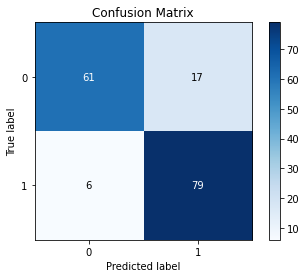

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        78
           1       0.82      0.93      0.87        85

    accuracy                           0.86       163
   macro avg       0.87      0.86      0.86       163
weighted avg       0.86      0.86      0.86       163



In [56]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()
print(classification_report(y_test,y_pred_log))

### Random Forest Classifier

In [57]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) 
y_pred_rand2 = Rand2.predict(x_test) 
A2 = accuracy_score(y_test,y_pred_rand2)
CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [58]:
print("Accuracy Score:",A2)
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

Accuracy Score: 0.852760736196319
Cross Validation Score:  [0.80368098 0.76687117 0.84662577 0.90184049 0.90123457]
Avg_Cross_Validation Score:  0.8391653412103309


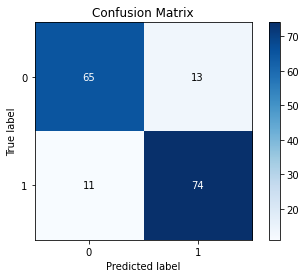

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        78
           1       0.85      0.87      0.86        85

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163



In [59]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand2)
plt.show()
print(classification_report(y_test,y_pred_rand2))

### Decision Tree Classifier

In [60]:
dt = DecisionTreeClassifier() 
dt.fit(x_train,y_train) 
y_pred_dt = dt.predict(x_test) 
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)

Accuracy Score: 0.754601226993865
Cross Validation Score:  [0.76687117 0.69325153 0.78527607 0.85276074 0.88888889]
Avg_Cross_Validation Score:  0.7839051730667272


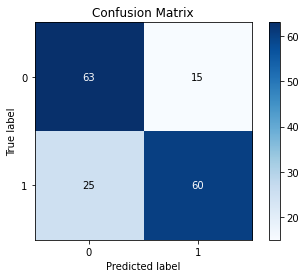

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        78
           1       0.80      0.71      0.75        85

    accuracy                           0.75       163
   macro avg       0.76      0.76      0.75       163
weighted avg       0.76      0.75      0.75       163



In [61]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()
print(classification_report(y_test,y_pred_dt))

### KNeighbors Classifier

In [62]:
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train) 
y_pred_knn = knn.predict(x_test) 
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)

Acicuracy Score: 0.7300613496932515
Cross Validation Score:  [0.67484663 0.71165644 0.74233129 0.76687117 0.75925926]
Avg_Cross_Validation Score:  0.7309929561463304


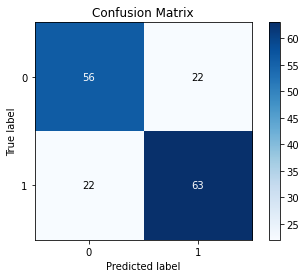

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        78
           1       0.74      0.74      0.74        85

    accuracy                           0.73       163
   macro avg       0.73      0.73      0.73       163
weighted avg       0.73      0.73      0.73       163



In [63]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()
print(classification_report(y_test,y_pred_knn))

### AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier(n_estimators=10)
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)

Accuracy Score: 0.7607361963190185
Cross Validation Score:  [0.68711656 0.68711656 0.77300613 0.79754601 0.83950617]
Avg_Cross_Validation Score:  0.7568582897826251


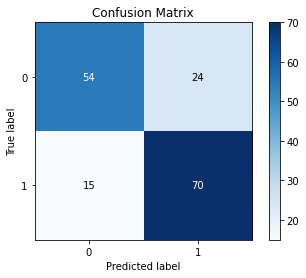

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.74      0.82      0.78        85

    accuracy                           0.76       163
   macro avg       0.76      0.76      0.76       163
weighted avg       0.76      0.76      0.76       163



In [65]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()
print(classification_report(y_test,y_pred_adb))

### SVC

In [66]:
from sklearn.svm import SVC
sv=SVC() 
sv.fit(x_train,y_train) 
y_pred_sv = sv.predict(x_test) 
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)

Accuracy Score: 0.7791411042944786
Cross Validation Score:  [0.72392638 0.71165644 0.80981595 0.87730061 0.85185185]
Avg_Cross_Validation Score:  0.794910247670984


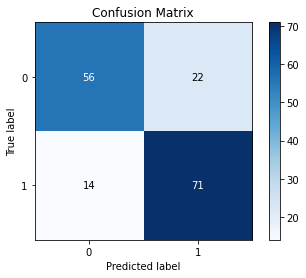

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        78
           1       0.76      0.84      0.80        85

    accuracy                           0.78       163
   macro avg       0.78      0.78      0.78       163
weighted avg       0.78      0.78      0.78       163



In [67]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()
print(classification_report(y_test,y_pred_sv))

### BernoulliNB

In [68]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train) 
y_pred_nb = nb.predict(x_test) 
A7 = accuracy_score(y_test,y_pred_nb)
print("Accuracy Score:",A7)
print("Cross Validation Score: ", cross_val_score(nb,X_scaled,Y_over,cv=5))
CV7 = cross_val_score(nb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV7)

Accuracy Score: 0.7361963190184049
Cross Validation Score:  [0.71165644 0.71165644 0.7607362  0.74233129 0.77160494]
Avg_Cross_Validation Score:  0.7395970612739529


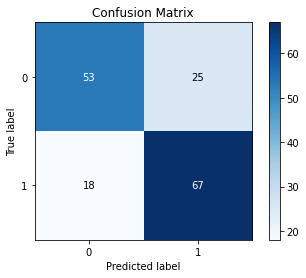

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        78
           1       0.73      0.79      0.76        85

    accuracy                           0.74       163
   macro avg       0.74      0.73      0.73       163
weighted avg       0.74      0.74      0.74       163



In [69]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_nb)
plt.show()
print(classification_report(y_test,y_pred_nb))

In [70]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC','BernoulliNB Classifier'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6,A7],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6,CV7]})


Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [71]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.858896,0.799826,0.059070
1,Random Forest Classifier,0.852761,0.839165,0.013595
2,Decision Tree,0.754601,0.783905,-0.029304
3,KNeighbors Classifier,0.730061,0.730993,-0.000932
4,AdaBoost Classifier,0.760736,0.756858,0.003878
5,SVC,0.779141,0.794910,-0.015769
6,BernoulliNB Classifier,0.736196,0.739597,-0.003401


In [72]:
Overall_Score['Difference'].min()

-0.02930394607286224

In [73]:
Overall_Score[Overall_Score['Difference']==-0.02930394607286224]


,Model,Accuracy_Score,Cross_Validation_Score,Difference
2,Decision Tree,0.754601,0.783905,-0.029304


Decision Tree Classifier is the best model with 75.46 % accuracy score.

# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto','sqrt'],'min_samples_leaf':range(10),'splitter':['best','rand'],
           'min_weight_fraction_leaf':[0.0,0.1],'min_samples_split':range(8),'criterion':['gini']}
gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 8),
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'splitter': ['best', 'rand']})

In [76]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.7649677040516736 {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [77]:
DT = DecisionTreeClassifier(criterion = 'gini', max_features = 'auto', min_samples_leaf = 1, 
                            min_samples_split= 6, min_weight_fraction_leaf= 0.0, splitter = 'best')  
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

# Saving the model

In [78]:
import joblib
joblib.dump(DT,'Loan_Application.obj')

['Loan_Application.obj']

In [79]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(DT,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(DT,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.7361963190184049
Cross Validation Score:  [0.74846626 0.72392638 0.7607362  0.77300613 0.7654321 ]
Avg_Cross_Validation Score:  0.726130424903431



Confusion Matrix


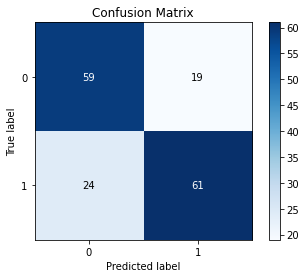

In [80]:
print('\nConfusion Matrix')
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [81]:
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.71      0.76      0.73        78
           1       0.76      0.72      0.74        85

    accuracy                           0.74       163
   macro avg       0.74      0.74      0.74       163
weighted avg       0.74      0.74      0.74       163




Precision Recall Curve




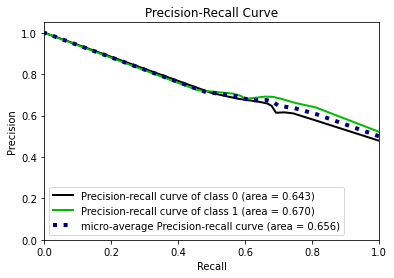

In [82]:
import matplotlib.pyplot as plt
import scikitplot as skplt
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)
print('\nPrecision Recall Curve\n\n')
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()


ROC Curve




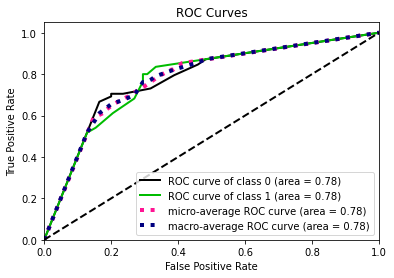

In [83]:
import matplotlib.pyplot as plt
import scikitplot as skplt
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)
print('\nROC Curve\n\n')
skplt.metrics.plot_roc(y_test, probas)
plt.show()

In [85]:
loaded_model = joblib.load(open('Loan_Application.obj','rb'))

In [86]:
score = loaded_model.score(x_test,y_test) 
print("Test score: {0:.2f} %".format(100 * score))
Predictions = loaded_model.predict(x_test)
Predictions

Test score: 73.62 %


array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0])

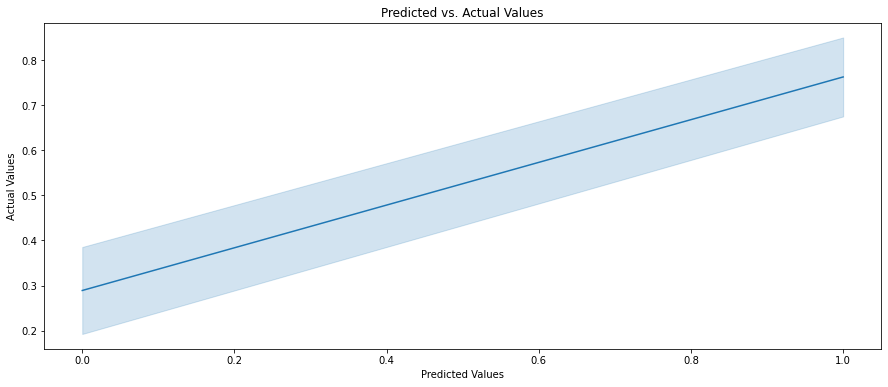

In [87]:
plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [88]:
list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

In [89]:
pd.set_option('display.max_rows', None)

In [90]:
Result

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
5,1,0
6,1,1
7,0,0
8,0,0
9,0,0
